In [80]:
import pandas as pd
import os
import matplotlib.pyplot as plt

## Reading The Data

In [81]:
files = [file for file in os.listdir("C:\\Users\\3alo0lo\\Downloads\\Pandas-Data-Science-Tasks-master\\SalesAnalysis\\Sales_Data")]
all_months_data = pd.DataFrame()
for file in files:
    all_months_data = pd.concat([all_months_data, pd.read_csv("C:\\Users\\3alo0lo\\Downloads\\Pandas-Data-Science-Tasks-master\\SalesAnalysis\\Sales_Data\\"+file)])
all_months_data.to_csv("all_data.csv", index=False)

In [82]:
all_data = pd.read_csv("all_data.csv")
all_data.head()

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address
0,176558,USB-C Charging Cable,2,11.95,4/19/2019 8:46,"917 1st St, Dallas, TX 75001"
1,176559,Bose SoundSport Headphones,1,99.99,4/7/2019 22:30,"682 Chestnut St, Boston, MA 02215"
2,176560,Google Phone,1,600,4/12/2019 14:38,"669 Spruce St, Los Angeles, CA 90001"
3,176560,Wired Headphones,1,11.99,4/12/2019 14:38,"669 Spruce St, Los Angeles, CA 90001"
4,176561,Wired Headphones,1,11.99,4/30/2019 9:27,"333 8th St, Los Angeles, CA 90001"


# Data Preprocessing

In [83]:
all_data = all_data.dropna(how='all')
all_data = all_data[all_data["Order ID"] != "Order ID"]


### Q1: What was the best month for sales? How much earned that month? 

In [84]:
all_data["Month"] = [int(d.split('/')[0]) for d in all_data["Order Date"]]
all_data["Sales"] = all_data["Quantity Ordered"].astype("int32") * all_data["Price Each"].astype("float")

In [85]:
sum_all_data_byMonth = all_data.groupby(['Month']).sum()
sum_all_data_byMonth[sum_all_data_byMonth["Sales"] == sum_all_data_byMonth["Sales"].max()]


,Sales
Month,
12,4.613443e+06


<function matplotlib.pyplot.show(*args, **kw)>

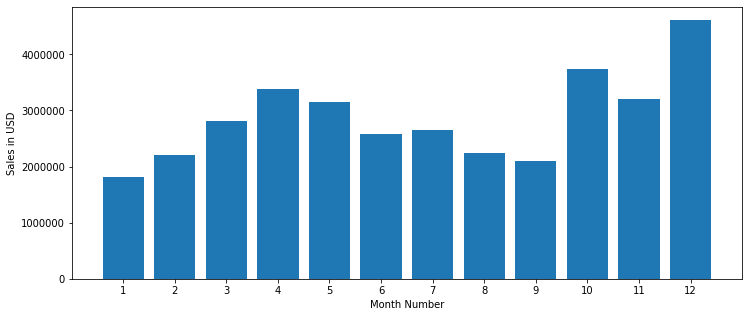

In [86]:
months = range(1,13)
plt.bar(months, sum_all_data_byMonth["Sales"])
plt.xticks(months)
plt.xlabel("Month Number")
plt.ylabel("Sales in USD")
plt.show

### Q2: What city had the heighest number of sales?

In [87]:
all_data["City"] = [city.split(", ")[1] for city in all_data["Purchase Address"]]

In [88]:
sum_all_data_byCity = all_data[["Sales","City"]] .groupby("City").sum()
sum_all_data_byCity[sum_all_data_byCity["Sales"] == sum_all_data_byCity["Sales"].max()]

,Sales
City,
San Francisco,8.262204e+06


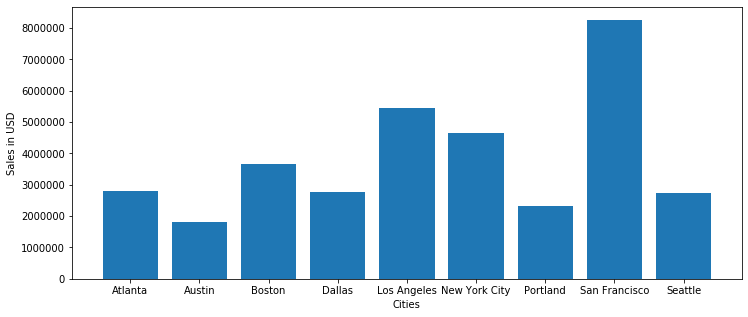

In [89]:
cities = [city[0] for city in all_data.groupby("City")]
plt.rcParams["figure.figsize"] = (12,5)
plt.bar(cities, sum_all_data_byCity["Sales"])
plt.xticks(cities)
plt.xlabel("Cities")
plt.ylabel("Sales in USD")
plt.show()

### Q3: what time should we display advertisements to maximize likelihood of customer's buying product?

In [90]:
all_data['Order Date'] = pd.to_datetime(all_data['Order Date'])

In [91]:
all_data['Hour'] = all_data['Order Date'].dt.hour
all_data['Minute'] = all_data['Order Date'].dt.minute
all_data.head()

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,Month,Sales,City,Hour,Minute
0,176558,USB-C Charging Cable,2,11.95,2019-04-19 08:46:00,"917 1st St, Dallas, TX 75001",4,23.90,Dallas,8,46
1,176559,Bose SoundSport Headphones,1,99.99,2019-04-07 22:30:00,"682 Chestnut St, Boston, MA 02215",4,99.99,Boston,22,30
2,176560,Google Phone,1,600,2019-04-12 14:38:00,"669 Spruce St, Los Angeles, CA 90001",4,600.00,Los Angeles,14,38
3,176560,Wired Headphones,1,11.99,2019-04-12 14:38:00,"669 Spruce St, Los Angeles, CA 90001",4,11.99,Los Angeles,14,38
4,176561,Wired Headphones,1,11.99,2019-04-30 09:27:00,"333 8th St, Los Angeles, CA 90001",4,11.99,Los Angeles,9,27


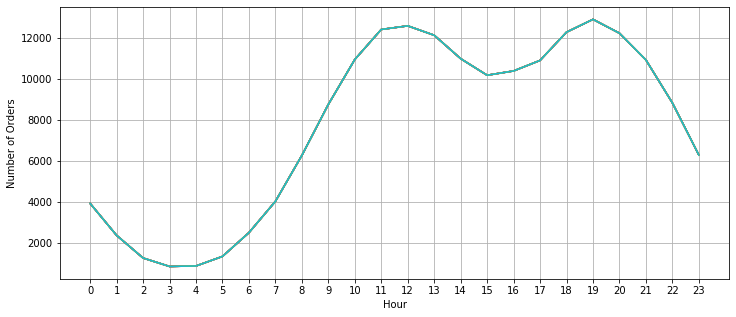

In [92]:
hours = [hour for hour, df in all_data.groupby('Hour')]
plt.plot(hours, all_data.groupby('Hour').count())
plt.grid()
plt.xticks(hours)
plt.xlabel("Hour")
plt.ylabel("Number of Orders")
plt.show()

In [93]:
#My recommendation is around 12 p.m. or 7 p.m.

### Q4: What pairs of products are most often sold together?

In [94]:
grouped_data = all_data[all_data["Order ID"].duplicated(keep=False)]
grouped_data["Total Order"] = grouped_data.groupby("Order ID")["Product"].transform(lambda x:','.join(x))
grouped_data = grouped_data[["Order ID", "Total Order"]].drop_duplicates()
grouped_data.head()

C:\Users\3alo0lo\Anaconda3\lib\site-packages\ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


,Order ID,Total Order
2,176560,"Google Phone,Wired Headphones"
17,176574,"Google Phone,USB-C Charging Cable"
29,176585,"Bose SoundSport Headphones,Bose SoundSport Hea..."
31,176586,"AAA Batteries (4-pack),Google Phone"
118,176672,"Lightning Charging Cable,USB-C Charging Cable"


In [95]:
from itertools import combinations
from collections import Counter

count = Counter()
for row in grouped_data["Total Order"]:
    row_list = row.split(',')
    count.update(Counter(combinations(row_list, 2)))
    
count.most_common(10)
    

[(('iPhone', 'Lightning Charging Cable'), 1005),
 (('Google Phone', 'USB-C Charging Cable'), 987),
 (('iPhone', 'Wired Headphones'), 447),
 (('Google Phone', 'Wired Headphones'), 414),
 (('Vareebadd Phone', 'USB-C Charging Cable'), 361),
 (('iPhone', 'Apple Airpods Headphones'), 360),
 (('Google Phone', 'Bose SoundSport Headphones'), 220),
 (('USB-C Charging Cable', 'Wired Headphones'), 160),
 (('Vareebadd Phone', 'Wired Headphones'), 143),
 (('Lightning Charging Cable', 'Wired Headphones'), 92)]

### Q5: What product is sold the most? why do you think it is sold  the most?

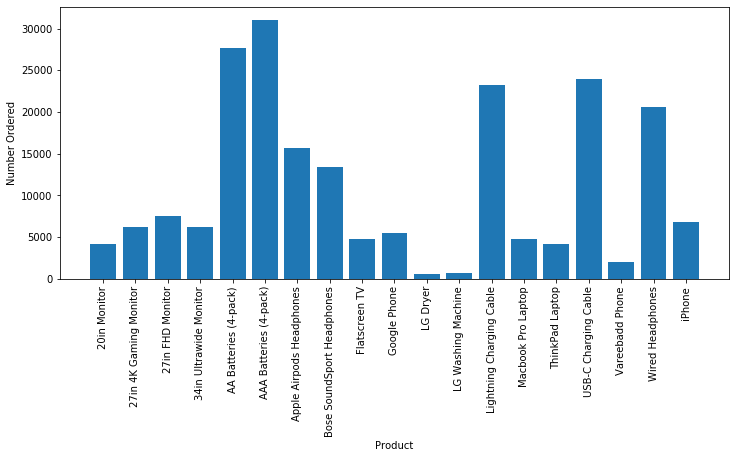

In [97]:
all_data["Quantity Ordered"] = all_data["Quantity Ordered"].astype("int32")
product_group = all_data.groupby("Product")
quantity_ordered = product_group.sum()["Quantity Ordered"]
products = [x for x,df in product_group]
plt.bar(products, quantity_ordered)
plt.xticks(products, rotation="vertical")
plt.xlabel("Product")
plt.ylabel("Number Ordered")
plt.show()

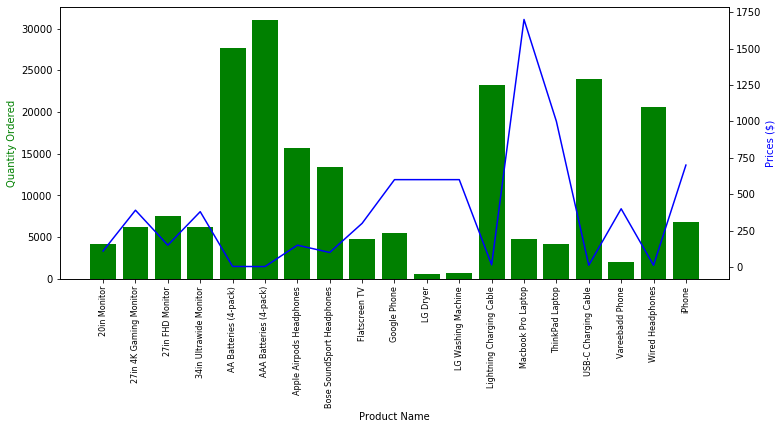

In [107]:
all_data["Price Each"] = all_data["Price Each"].astype("float")
prices = all_data.groupby("Product").mean()["Price Each"]
fig, ax1 = plt.subplots()
ax2 = ax1.twinx()
ax1.bar(products, quantity_ordered, color='g')
ax2.plot(products, prices, 'b-')

ax1.set_xlabel("Product Name")
ax1.set_ylabel("Quantity Ordered", color='g')
ax2.set_ylabel("Prices ($)", color="b")
ax1.set_xticklabels(products, rotation="vertical", size=8)
plt.show()

In [ ]:
# The most sold product is "AAA Batteries (4-pack)". It is the most sold because it is cheap and has high demand.